In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import matplotlib.pyplot as plt
%matplotlib inline

from keras.models import Sequential
from keras.layers import Dense , Dropout , Lambda, Flatten
from keras.optimizers import Adam ,RMSprop
from sklearn.model_selection import train_test_split
from keras import  backend as K
from keras.preprocessing.image import ImageDataGenerator

Using TensorFlow backend.


In [2]:
train = pd.read_csv("train.csv")
print(train.shape)
train.head(2)

(42000, 785)


,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
test= pd.read_csv("test.csv")
print(test.shape)
test.head(2)

(28000, 784)


,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
X_train = (train.iloc[:,1:].values).astype('float32') # all pixel values
y_train = train.iloc[:,0].values.astype('int32') # only labels i.e targets digits
X_test = test.values.astype('float32')

In [5]:
y_train

array([1, 0, 1, ..., 7, 6, 9], dtype=int32)

In [6]:
X_train = X_train.reshape(X_train.shape[0], 28, 28)

In [7]:
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)
X_test.shape

(28000, 28, 28, 1)

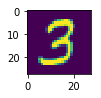

In [8]:
plt.subplot(332 )
plt.imshow(X_train[232])

In [9]:
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_train.shape

(42000, 28, 28, 1)

In [10]:
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)
X_test.shape

(28000, 28, 28, 1)

In [11]:
mean_px = X_train.mean().astype(np.float32)
std_px = X_train.std().astype(np.float32)

In [12]:
def standardize(x): 
    return (x-mean_px)/std_px

In [13]:
from keras.utils.np_utils import to_categorical
y_train= to_categorical(y_train)
num_classes = y_train.shape[1]
num_classes

10

In [14]:
y_train.shape

(42000, 10)

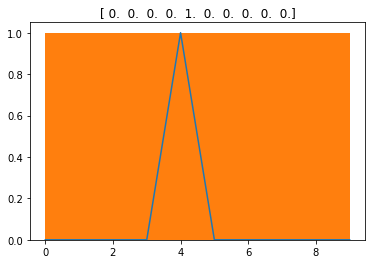

In [15]:
plt.title(y_train[39])
plt.plot(y_train[39])
plt.hist(range(10));

### DESIGN Neural Net

In [16]:
seed = 43
np.random.seed(seed)

In [17]:
from keras.models import  Sequential
from keras.layers.core import  Lambda , Dense, Flatten, Dropout
from keras.callbacks import EarlyStopping
from keras.layers import BatchNormalization, Convolution2D , MaxPooling2D

Linear model 

In [18]:
model= Sequential()
model.add(Lambda(standardize,input_shape=(28,28,1)))
model.add(Flatten())
model.add(Dense(10, activation='softmax'))
print("input shape ",model.input_shape)
print("output shape ",model.output_shape)

input shape  (None, 28, 28, 1)
output shape  (None, 10)


In [19]:
from keras.optimizers import RMSprop
model.compile(optimizer=RMSprop(lr=0.001),
 loss='categorical_crossentropy',
 metrics=['accuracy'])

In [20]:
from keras.preprocessing import image
gen = image.ImageDataGenerator()

CROSS Validation

In [21]:
from sklearn.model_selection import train_test_split
X = X_train
y = y_train
X_train_, X_val, y_train_, y_val = train_test_split(X_train, y_train, test_size=0.10, random_state=42)


In [22]:
batches = gen.flow(X_train, y_train, batch_size=64)
val_batches=gen.flow(X_val, y_val, batch_size=64)######

In [23]:
history=model.fit_generator(generator=batches, steps_per_epoch=batches.n, epochs=2, 
                    validation_data=val_batches, validation_steps=val_batches.n)

Epoch 1/2
37800/37800 [==============================] - 228s 6ms/step - loss: 0.2400 - acc: 0.9342 - val_loss: 0.3395 - val_acc: 0.9091
Epoch 2/2
37800/37800 [==============================] - 222s 6ms/step - loss: 0.2158 - acc: 0.9415 - val_loss: 0.3452 - val_acc: 0.9119


In [24]:
history_dict = history.history
history_dict.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

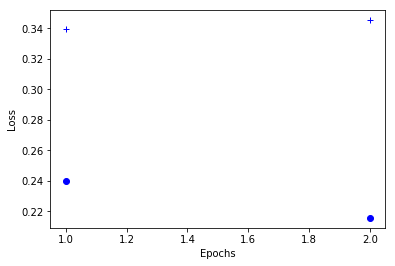

In [25]:
import matplotlib.pyplot as plt
%matplotlib inline
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss_values, 'bo')
# b+ is for "blue crosses"
plt.plot(epochs, val_loss_values, 'b+')
plt.xlabel('Epochs')
plt.ylabel('Loss')

plt.show()

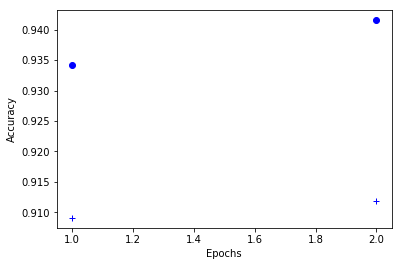

In [26]:
plt.clf()   # clear figure
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']

plt.plot(epochs, acc_values, 'bo')
plt.plot(epochs, val_acc_values, 'b+')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

plt.show()

Fully Connected Model¶
https://www.kaggle.com/poonaml/deep-neural-network-keras-way/notebook

In [27]:
print("Generating test predictions...")
preds = model.predict_classes(X_test, verbose=0)

Generating test predictions...


In [28]:
submissions=pd.DataFrame({"ImageId": list(range(1,len(preds)+1)),
                         "Label": preds})
submissions.to_csv("linear2.csv", index=False, header=True)

0.91285 Full set epoch 2
